<a href="https://colab.research.google.com/github/EmmanuelADAM/IntelligenceArtificiellePython/blob/master/choixSejourLogiqueFloue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Séjours dans le flou avec skfuzzy

L'objectif est de pouvoir représenter des règles de type :
- SI le beau temps est prévu ALORS j’achète l’offre de location pour une longue durée
- SI le beau temps est prévu et que le loyer est cher ALORS j’achète l’offre de location pour une moyenne durée
- SI le temps est de moyen à beau, ET que la location reste abordable, ALORS j’achète l’offre pour une moyenne durée
- SI le temps prévu est mauvais, MAIS que la location est très abordable, ALORS j’achète l’offre pour une courte durée
- le reste du temps, SI la location est chère ET qu’il ne fait pas beau, ALORS je n’y vais pas ; de même SI la location est dans des prix abordable MAIS qu’il fait mauvais

Une partie du code est absent, référez-vous  l'exemple sur la logique floue et le freinage pour compléter ce code...

On utilise pour cela la librairie python skfuzzy
*(si elle n'est pas présente, installez là avec cette ligne : !pip install -U scikit-fuzzy)*

In [ ]:
 !pip install -U scikit-fuzzy

In [2]:
#les imports
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

## les antécédents et les conséquents
- Les antécédents sont les variables utilisées pour prendre les décisions (ici la météo, le coût)
- les conséquents sont les déductions (ici la durée de séjour)

In [3]:
#### Antecedent et Consequent
# la taille est située dans un intervale de 0 à 40 coupé par pas de 1 
meteo = ctrl.Antecedent(np.arange(0,40,1), 'meteo')
# l'offre de séjour est située dans un intervale de 0 à 200 la nuit, coupé par pas de 5
offre = ctrl.Antecedent(np.arange(0,200,5), 'offre')
# la durée de séjour est située dans un intervale de 0 à 5 coupé par pas de 0.5 
duree = ctrl.Consequent(np.arange(0,5,0.5), 'duree')

In [4]:
meteo


Antecedent: meteo

### intervales
on définit ensuite les intervales utilisés dans les antécédents et les conséquents.
#### La météo
- le temps est beau à partir de 22°, moyen à partir de 15°, frais en dessous


In [5]:
#une courbe trapezoïdale, moche=1 jusque 11°, petit=0 à partir de 15°
meteo_moche = fuzz.trapmf(meteo.universe, [meteo.universe[0], meteo.universe[0], 11,15])
#une courbe trapezoïdale, moyenne=0 jusque 13°, moyenne=1 à partir de 15°, à 0 à partir de 20°
meteo_moyenne = fuzz.trapmf(meteo.universe, [13, 15, 19, 20])
#une courbe trapezoïdale, belle=0 jusque 20°, belle=1 à partir de 22°
meteo_belle = fuzz.trapmf(meteo.universe, [20, 22, meteo.universe[-1],meteo.universe[-1]])
meteo['moche'] = meteo_moche
meteo['moyenne'] = meteo_moyenne
meteo['belle'] = meteo_belle

In [6]:
meteo.terms.values()
meteo_moche

array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 0.75, 0.5 , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

On peut vérifier les courbes d'appartenance : 
- *ici les courbes sont trapézoidales, mais vous pouvez les définir autrement*

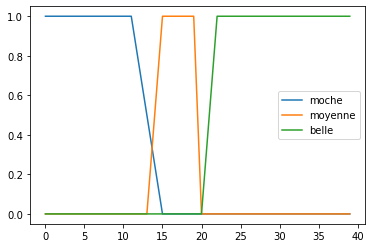

In [7]:
plt.plot(meteo.universe, meteo_moche,  label='moche')
plt.plot(meteo.universe, meteo_moyenne,label='moyenne')
plt.plot(meteo.universe, meteo_belle,  label='belle')
plt.legend()
plt.show()


#### Le coût
- une offre sous 30€ la nuit est très abordable, elle reste abordable jusque 70€, elle est ressentie comme chère ensuite

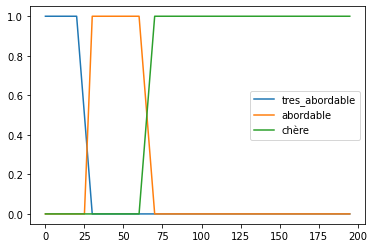

In [8]:

cout_faible = fuzz.trapmf(offre.universe, [offre.universe[0], offre.universe[0], 20,30])
cout_moyen = fuzz.trapmf(offre.universe, [25, 30, 60,70])
cout_eleve = fuzz.trapmf(offre.universe, [60, 70, offre.universe[-1], offre.universe[-1]])
offre['tres_abordable'] = cout_faible
offre['abordable'] = cout_moyen
offre['chere'] = cout_eleve
#juste pour voir les courbes
plt.plot(offre.universe, cout_faible, label='tres_abordable')
plt.plot(offre.universe, cout_moyen,  label='abordable')
plt.plot(offre.universe, cout_eleve,  label='chère')
plt.legend()
plt.show()

In [9]:
cout_moyen

array([0. , 0. , 0. , 0. , 0. , 0. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. ])

#### La durée
- une durée de séjour est considérée longue à partir de 3j
- une durée est moyenne entre 2j et 3j
- une courte durée tient de 1j à 2j
- ne pas partir reviens à une durée de 0j à 1j



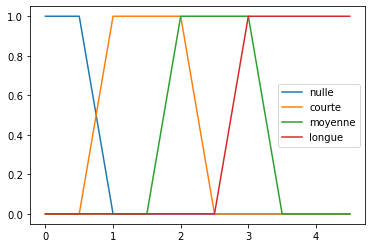

In [10]:

duree_nulle = fuzz.trapmf(duree.universe, [duree.universe[0], duree.universe[0], 0.5,1])
duree_courte = fuzz.trapmf(duree.universe, [0.75, 1, 2,2.5])
duree_moyenne = fuzz.trapmf(duree.universe, [1.5, 2, 3, 3.5])
duree_longue = fuzz.trapmf(duree.universe, [2.5, 3, duree.universe[-1], duree.universe[-1]])
duree['nulle'] = duree_nulle
duree['courte'] = duree_courte
duree['moyenne'] = duree_moyenne
duree['longue'] = duree_longue
#juste pour voir les courbes
plt.plot(duree.universe, duree_nulle,  label='nulle')
plt.plot(duree.universe, duree_courte, label='courte')
plt.plot(duree.universe, duree_moyenne,label='moyenne')
plt.plot(duree.universe, duree_longue, label='longue')
plt.legend()
plt.show()

## Définition des règles floues
Rappel, on souhaite définir : 
- si le beau temps est prévu alors j’achète l’offre de location pour une longue durée
- si le temps est de moyen, et que la location reste abordable, alors j’achète l’offre pour une moyenne durée
- si le temps prévu est mauvais, mais que la location est très abordable, alors j’achète l’offre pour une courte durée
- le reste du temps, si la location est chère et qu’il ne fait pas beau, je n’y vais pas ; de même si la location est dans des prix abordable mais qu’il fait mauvais



In [11]:

#on écrit
rule1 =  ctrl.Rule( meteo['belle'],                            duree['longue'])
rule2 =  ctrl.Rule( meteo['moyenne'] & offre['abordable'],     duree['moyenne'])
rule3 =  ctrl.Rule( meteo['moche']   & offre['tres_abordable'],duree['courte'])
rule4a = ctrl.Rule( meteo['moche']   & offre['chere'],         duree['nulle'])
rule4b = ctrl.Rule( meteo['moche']   & offre['abordable'],     duree['nulle'])
rule4c = ctrl.Rule( meteo['moyenne'] & offre['chere'],         duree['nulle'])



#on compile les règles
sejour_regles = ctrl.ControlSystem([rule1, rule2, rule3, rule4a, rule4b, rule4c])
sejour_decision = ctrl.ControlSystemSimulation(sejour_regles)

In [12]:
sejour_decision.input

meteo : None
offre : None

## Observations
Testons le système : 
- une offre à 70€ est repérée et la météo annonce 17°, quelle est la décision à prendre ?

In [13]:
sejour_decision.input['meteo'] = 20
sejour_decision.input['offre'] = 65

sejour_decision.compute()

print(sejour_decision.output['duree'])

ValueError: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.

la durée est <0.5, ce qui correspond à une durée nulle.

Vérifions en image :

In [ ]:
duree.view(sim=sejour_decision)

Que se passe-t-il lorsqu'une offre est trouvée à 80€ mais que la météo annonce 30° ?


In [ ]:
sejour_decision.input['meteo'] = 30
sejour_decision.input['offre'] = 80

sejour_decision.compute()

print(sejour_decision.output['duree'])

une durée de séjour longue est recomandée. vérification en image :

In [ ]:
duree.view(sim=sejour_decision)

#### Impact des courbes
- Changez les courbes pour étudier l'impact sur le résultat